# 4.1: Tensor

## 여러 가지 텐서

In [1]:
import torch
import numpy as np

In [2]:
x = torch.empty(5, 4)
print(x)

tensor([[3.1488e-08, 3.0854e-41, 7.0065e-44, 7.0065e-44],
        [6.3058e-44, 6.7262e-44, 7.1466e-44, 6.3058e-44],
        [6.7262e-44, 7.1466e-44, 1.1771e-43, 6.8664e-44],
        [6.7262e-44, 8.1275e-44, 7.4269e-44, 7.4269e-44],
        [8.1275e-44, 7.2868e-44, 7.8473e-44, 6.4460e-44]])


In [3]:
torch.ones(3, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [4]:
torch.zeros(2)

tensor([0., 0.])

In [5]:
torch.rand(5, 6)

tensor([[0.6694, 0.4426, 0.8813, 0.3107, 0.6913, 0.9967],
        [0.4341, 0.8873, 0.9939, 0.8536, 0.2305, 0.8937],
        [0.3594, 0.1265, 0.3538, 0.0463, 0.1420, 0.6761],
        [0.2695, 0.9600, 0.5801, 0.4977, 0.0145, 0.1573],
        [0.2016, 0.4436, 0.0866, 0.4380, 0.6197, 0.5219]])

## 리스트, 배열을 텐서로 만들기

In [6]:
l = [13, 4]
r = np.array([4, 56, 7])
torch.tensor(l)

tensor([13,  4])

In [7]:
torch.tensor(r)

tensor([ 4, 56,  7])

## 텐서의 크기, 타입, 연산

In [9]:
x.size()

torch.Size([5, 4])

In [10]:
x.size()[1]

4

In [11]:
type(x)

torch.Tensor

In [12]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
x + y

tensor([[0.6779, 0.9408],
        [0.6015, 0.9968]])

In [14]:
torch.add(x, y)

tensor([[0.6779, 0.9408],
        [0.6015, 0.9968]])

In [15]:
y.add(x)

tensor([[0.6779, 0.9408],
        [0.6015, 0.9968]])

In [16]:
y.add_(x) # in-place

tensor([[0.6779, 0.9408],
        [0.6015, 0.9968]])

In [17]:
y

tensor([[0.6779, 0.9408],
        [0.6015, 0.9968]])

## 텐서의 크기 변환

In [18]:
x = torch.rand(8, 8)
print(x.size())

torch.Size([8, 8])


In [19]:
a = x.view(64) # view: 텐서의 크기를 바꿔주는 함수
print(a.size())

torch.Size([64])


In [21]:
b = x.view(-1, 4, 4)
print(b.size())

torch.Size([4, 4, 4])


## 텐서에서 넘파이 배열로 변환

In [22]:
x = torch.rand(8, 8)
y = x.numpy()
type(y)

numpy.ndarray

## 단일 텐서에서 값으로 반환

In [23]:
x = torch.ones(1)
print(x.item()) # item은 숫자가 하나인 텐서를 스칼라로 반환

1.0


# 4.2: Backpropagation

## Gradient Tensor

In [24]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 1
z = 2 * y**2
r = z.mean()
print('Result: ', r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


```
requires_grad = True는 해당 텐서를 기준으로 모든 연산들을 추적하여 Gradient 배열을 계산
```

In [25]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


## Automatic Gradient

In [26]:
from matplotlib import pyplot as plt

In [48]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5, 1)
num_features = x.shape[1]

w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

loss_stack = []
for epoch in range(1001):
  optimizer.zero_grad()
  y_hat = torch.matmul(x, w) + b

  loss = torch.mean((y_hat - y)**2)
  loss.backward()
  optimizer.step()
  loss_stack.append(loss.item())

  if epoch % 100 == 0:
    print(f'Epoch {epoch}: {loss.item()}')

Epoch 0: 117.54228210449219
Epoch 100: 8.171041488647461
Epoch 200: 0.7995772957801819
Epoch 300: 0.29296791553497314
Epoch 400: 0.24948227405548096
Epoch 500: 0.2382175624370575
Epoch 600: 0.23005959391593933
Epoch 700: 0.22294369339942932
Epoch 800: 0.21663694083690643
Epoch 900: 0.21104088425636292
Epoch 1000: 0.206074520945549


In [49]:
with torch.no_grad(): # requires_grad 비활성화
  y_hat = torch.matmul(x, w) + b

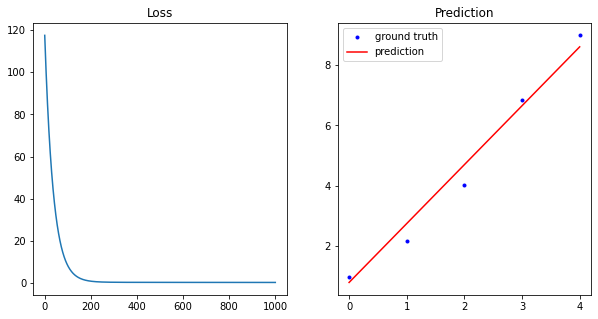

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title('Loss')

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth', 'prediction'])
plt.title('Prediction')

plt.show()

# 4.3: 데이터 불러오기

## Data Loader

In [51]:
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset

In [52]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

print(trainset[0][0].size())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([3, 16, 16])


In [58]:
trainset[0][1] # label

6

In [68]:
trainloader = DataLoader(trainset, batch_size=50, shuffle=True) # mini-batch
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [62]:
print(len(trainset), len(trainloader))

50000 1000


In [65]:
images, labels = iter(trainloader).next()
print(images.size()) # [batch size, channel, width, height]

torch.Size([50, 3, 16, 16])


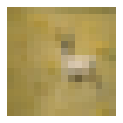

In [69]:
oneshot = images[1].permute(1, 2, 0).numpy() # (3, 16, 16) -> (16, 16, 3)
plt.figure(figsize=(2, 2))
plt.imshow(oneshot)
plt.axis('off')
plt.show()

## 커스텀 데이터 불러오기

In [73]:
# 32x32 RGB컬러 이미지 100장, 라벨 생성

train_images = np.random.randint(256, size=(100, 32,32, 3))/255
train_labels = np.random.randint(2, size=(100, 1))

In [77]:
class TensorData(Dataset):
  def __init__(self, x_data, y_data):
    self.x_data = torch.FloatTensor(x_data)
    self.x_data = self.x_data.permute(0, 3, 1, 2)
    self.y_data = torch.LongTensor(y_data)
    self.len = self.y_data.shape[0]

  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]

  def __len__(self):
    return self.len

In [78]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

## 커스텀 전처리 사용하기

In [79]:
# 텐서 변환
class ToTensor:
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2, 0, 1)
    return inputs, torch.LongTensor(labels)

In [89]:
# CutOut(이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 데이터 증식 방법)
class CutOut:
  def __init__(self, ratio=.5):
    self.ratio = int(1/ratio)

  def __call__(self, sample):
    inputs, labels = sample
    active = int(np.random.randint(0, self.ratio, 1))

    if active == 0:
      _, w, h = inputs.size()
      min_len = min(w, h)
      box_size = int(min_len//4)
      idx = int(np.random.randint(0, min_len - box_size, 1))
      inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

    return inputs, labels

In [91]:
class MyDataset(Dataset):
  def __init__(self, x_data, y_data, transform=None):
    self.x_data = x_data
    self.y_data = y_data
    self.transform = transform
    self.len = len(y_data)
    self.tensor = ToTensor()

  def __getitem__(self, index):
      sample =  self.x_data[index], self.y_data[index]

      if self.transform:
        sample = self.transform(sample)
      else:
        sample = self.tensor(sample)
      return sample

  def __len__(self):
    return self.len

In [92]:
trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

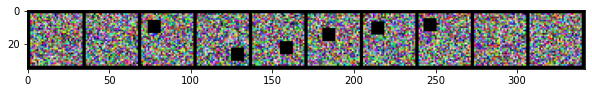

In [93]:
images1, labels1 = iter(train_loader1).next()

def imshow(img):
  plt.figure(figsize=(10, 100))
  plt.imshow(img.permute(1, 2, 0).numpy())
  plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

## 파이토치 제공 전처리 사용하기

In [94]:
class MyTransform:
  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2, 0, 1)
    labels = torch.FloatTensor(labels)

    transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()])
    final_output = transf(inputs)

    return final_output, labels

In [95]:
dataset2 = MyDataset(train_images, train_labels, transform=MyTransform())
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

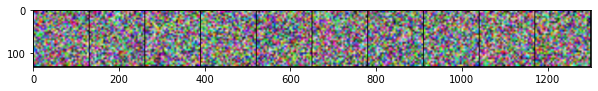

In [96]:
images2, labels2 = iter(train_loader2).next()

imshow(torchvision.utils.make_grid(images2, nrow=10))

## 커스텀 전처리 + 파이토치 제공 전처리

In [101]:
class CutOut:
  def __init__(self, ratio=.5):
    self.ratio = int(1/ratio)

  def __call__(self, inputs):
    active = int(np.random.randint(0, self.ratio, 1))

    if active == 0:
      _, w, h = inputs.size()
      min_len = min(w, h)
      box_size = int(min_len//4)
      idx = int(np.random.randint(0, min_len - box_size, 1))
      inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

    return inputs

In [102]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)

Files already downloaded and verified


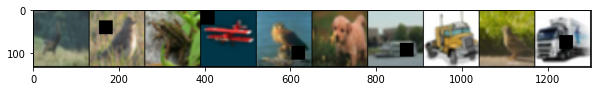

torch.Size([10, 3, 128, 128])


In [103]:
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images, nrow=10))
print(images.size())